## Oil and Gas Industry Baseline model

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../../mcussac/data_forecast_carbon/Historical_Emissions.csv")
pd.set_option('display.max_columns', None)
data.head()


TCUID              Company          ISIN  Financial Year  GICS Sector Code  \
0  42694  Erste Group Bank AG  AT0000652011            2005              40.0   
1  42694  Erste Group Bank AG  AT0000652011            2006              40.0   
2  42694  Erste Group Bank AG  AT0000652011            2007              40.0   
3  42694  Erste Group Bank AG  AT0000652011            2008              40.0   
4  42694  Erste Group Bank AG  AT0000652011            2009              40.0   

  GICS Sector Name  GICS Industry Group Code GICS Industry Group Name  \
0       Financials                    4010.0                    Banks   
1       Financials                    4010.0                    Banks   
2       Financials                    4010.0                    Banks   
3       Financials                    4010.0                    Banks   
4       Financials                    4010.0                    Banks   

   GICS Industry Code GICS Industry Name  GICS Sub Industry Code  \
0            401010.0              Banks              40101010.0   
1            401010.0              Banks              40101010.0   
2            401010.0              Banks              40101010.0   
3            401010.0              Banks              40101010.0   
4            401010.0              Banks              40101010.0   

  GICS Sub Industry Name                                   GICS Description  \
0      Diversified Banks  Commercial banks whose businesses are derived ...   
1      Diversified Banks  Commercial banks whose businesses are derived ...   
2      Diversified Banks  Commercial banks whose businesses are derived ...   
3      Diversified Banks  Commercial banks whose businesses are derived ...   
4      Diversified Banks  Commercial banks whose businesses are derived ...   

                                 Trucost Sector Name Trucost Sector  Country  \
0  Monetary authorities and depository credit int...         52A000  AUSTRIA   
1  Monetary authorities and depository credit int...         52A000  AUSTRIA   
2  Monetary authorities and depository credit int...         52A000  AUSTRIA   
3  Monetary authorities and depository credit int...         52A000  AUSTRIA   
4  Monetary authorities and depository credit int...         52A000  AUSTRIA   

   Carbon-Scope 1 (tonnes CO2e)  Carbon-Scope 2 (tonnes CO2e)  \
0                   7596.054435                   6814.325028   
1                  12552.501135                  10906.081210   
2                  11476.177472                   9656.932392   
3                  11104.953114                  19302.583214   
4                  28018.732600                  65432.344312   

   Carbon-Scope 3 (tonnes CO2e)  Carbon-Direct (tonnes CO2e)  \
0                 164017.684486                  7596.054435   
1                 258799.303026                 12552.501135   
2                 232394.411879                 11476.177472   
3                 238060.077199                 11104.953114   
4                 302681.312761                 28018.732600   

   Carbon-First Tier Indirect (tonnes CO2e)  \
0                              31981.789915   
1                              52125.089787   
2                              47397.574615   
3                              59544.335750   
4                             114091.239716   

   Carbon-Direct+First Tier Indirect (tonnes CO2e)  \
0                                     39577.844350   
1                                     64677.590922   
2                                     58873.752087   
3                                     70649.288864   
4                                    142109.972316   

   Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)  \
0                                       1.347260   
1                                       1.308070   
2                                       1.270021   
3                                       1.139229   
4                                       2.403201   

   Carbon Inten

In [30]:
to_drop = ['Company', 'ISIN','GICS Sector Code','GICS Industry Group Code','GICS Industry Code', 'GICS Sub Industry Code', \
          'GICS Description', 'Trucost Sector Name', 'Trucost Sector', 'Country','Carbon Disclosure','Currency Code','Accounting Year End','FigureRestate', 'EffectiveDate']
data_d = data.copy().drop(columns=to_drop)
data_d.head()

TCUID  Financial Year GICS Sector Name GICS Industry Group Name  \
0  42694            2005       Financials                    Banks   
1  42694            2006       Financials                    Banks   
2  42694            2007       Financials                    Banks   
3  42694            2008       Financials                    Banks   
4  42694            2009       Financials                    Banks   

  GICS Industry Name GICS Sub Industry Name  Carbon-Scope 1 (tonnes CO2e)  \
0              Banks      Diversified Banks                   7596.054435   
1              Banks      Diversified Banks                  12552.501135   
2              Banks      Diversified Banks                  11476.177472   
3              Banks      Diversified Banks                  11104.953114   
4              Banks      Diversified Banks                  28018.732600   

   Carbon-Scope 2 (tonnes CO2e)  Carbon-Scope 3 (tonnes CO2e)  \
0                   6814.325028                 164017.684486   
1                  10906.081210                 258799.303026   
2                   9656.932392                 232394.411879   
3                  19302.583214                 238060.077199   
4                  65432.344312                 302681.312761   

   Carbon-Direct (tonnes CO2e)  Carbon-First Tier Indirect (tonnes CO2e)  \
0                  7596.054435                              31981.789915   
1                 12552.501135                              52125.089787   
2                 11476.177472                              47397.574615   
3                 11104.953114                              59544.335750   
4                 28018.732600                             114091.239716   

   Carbon-Direct+First Tier Indirect (tonnes CO2e)  \
0                                     39577.844350   
1                                     64677.590922   
2                                     58873.752087   
3                                     70649.288864   
4                                    142109.972316   

   Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)  \
0                                       1.347260   
1                                       1.308070   
2                                       1.270021   
3                                       1.139229   
4                                       2.403201   

   Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)  \
0                                       1.208610   
1                                       1.136500   
2                                       1.068693   
3                                       1.980203   
4                                       5.612213   

   Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)  \
0                                      29.090685   
1                                      26.968945   
2                                      25.718129   
3                                      24.421979   
4                                      25.961351   

   Carbon Intensity-Direct (tonnes CO2e/USD mn)  \
0                                      1.347260   
1                                      1.308070   
2                                      1.270021   
3                                      1.139229   
4                                      2.403201   

   Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)  \
0                                           5.672389           
1                                           5.431849           
2                                           5.245294           
3                                           6.108502           
4                                           9.785747           

   Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)  \
0                                           7.019649                  
1                                           6.739919                  
2                                           6.515315                  
3                              

In [82]:
from_2005_2020 = data_d[(data_d["Financial Year"] == 2005) | (data_d["Financial Year"] == 2006) | (data_d["Financial Year"] == 2007) | (data_d["Financial Year"] == 2008) | (data_d["Financial Year"] == 2009) | (data_d["Financial Year"] == 2010) | (data_d["Financial Year"] == 2011) | (data_d["Financial Year"] == 2012) | (data_d["Financial Year"] == 2013) | (data_d["Financial Year"] == 2014) | (data_d["Financial Year"] == 2015) | (data_d["Financial Year"] == 2016) | (data_d["Financial Year"] == 2017) | (data_d["Financial Year"] == 2018) | (data_d["Financial Year"] == 2019) | (data_d["Financial Year"] == 2020)]
from_2005_2020.shape




(127279, 26)

In [104]:
id_2005_2020 = pd.DataFrame(from_2005_2020.TCUID.value_counts() == 16).reset_index()
valid_tcuid = id_2005_2020[id_2005_2020.TCUID == True].sort_values("index")
tucid_list = valid_tcuid["index"].to_list()
tucid_list

[42727,
 42733,
 42734,
 42737,
 42738,
 42746,
 42749,
 42751,
 42762,
 42773,
 42779,
 42795,
 42797,
 42809,
 42821,
 42828,
 42835,
 42837,
 42843,
 42844,
 42854,
 42863,
 42872,
 42878,
 42884,
 42886,
 42892,
 42897,
 42909,
 42910,
 42913,
 42921,
 42922,
 42927,
 42930,
 42934,
 42938,
 42947,
 42949,
 42965,
 42973,
 42986,
 42997,
 42998,
 42999,
 43005,
 43006,
 43015,
 43019,
 43029,
 43033,
 43034,
 43049,
 43050,
 43051,
 43057,
 43058,
 43066,
 43068,
 43069,
 43074,
 43079,
 43080,
 43081,
 43090,
 43094,
 43108,
 43109,
 43111,
 43113,
 43125,
 43126,
 43134,
 43136,
 43141,
 43143,
 43146,
 43151,
 43155,
 43157,
 43168,
 43173,
 43174,
 43177,
 43180,
 43183,
 43193,
 43194,
 43195,
 43196,
 43197,
 43199,
 43201,
 43205,
 43211,
 43220,
 43222,
 43225,
 43230,
 43234,
 43235,
 43237,
 43239,
 43243,
 43255,
 43260,
 43264,
 43269,
 43271,
 43280,
 43284,
 43285,
 43288,
 43296,
 43297,
 43300,
 43302,
 43320,
 43321,
 43322,
 43328,
 43333,
 43334,
 43349,
 43356,


In [105]:
data_2005_2020 = data_d[data_d.TCUID.isin(tucid_list)]
data_2005_2020

TCUID  Financial Year  GICS Sector Name  \
285      42727            2005        Financials   
286      42727            2006        Financials   
287      42727            2007        Financials   
288      42727            2008        Financials   
289      42727            2009        Financials   
...        ...             ...               ...   
121035  236388            2016  Consumer Staples   
121036  236388            2017  Consumer Staples   
121037  236388            2018  Consumer Staples   
121038  236388            2019  Consumer Staples   
121039  236388            2020  Consumer Staples   

             GICS Industry Group Name              GICS Industry Name  \
285            Diversified Financials  Diversified Financial Services   
286            Diversified Financials  Diversified Financial Services   
287            Diversified Financials  Diversified Financial Services   
288            Diversified Financials  Diversified Financial Services   
289            Diversified Financials  Diversified Financial Services   
...                               ...                             ...   
121035  Household & Personal Products               Personal Products   
121036  Household & Personal Products               Personal Products   
121037  Household & Personal Products               Personal Products   
121038  Household & Personal Products               Personal Products   
121039  Household & Personal Products               Personal Products   

       GICS Sub Industry Name  Carbon-Scope 1 (tonnes CO2e)  \
285     Multi-Sector Holdings                  2.237322e+05   
286     Multi-Sector Holdings                  2.167756e+05   
287     Multi-Sector Holdings                  2.536060e+05   
288     Multi-Sector Holdings                  4.526409e+07   
289     Multi-Sector Holdings                  3.769517e+07   
...                       ...                           ...   
121035      Personal Products                  8.630871e+05   
121036      Personal Products                  7.994915e+05   
121037      Personal Products                  7.541265e+05   
121038      Personal Products                  6.546316e+05   
121039      Personal Products                  6.084177e+05   

        Carbon-Scope 2 (tonnes CO2e)  Carbon-Scope 3 (tonnes CO2e)  \
285                     5.716521e+05                  2.987047e+06   
286                     4.280086e+05                  2.306463e+06   
287                     5.106819e+05                  2.542348e+06   
288                     1.947939e+06                  5.022240e+06   
289                     1.533128e+06                  4.228791e+06   
...                              ...                           ...   
121035                  1.501421e+06                  2.016408e+07   
121036                  1.461000e+06                  2.340770e+07   
121037                  1.430659e+06                  2.257263e+07   
121038                  1.278171e+06                  1.946748e+07   
121039                  1.264328e+06                  1.973175e+07   

        Carbon-Direct (tonnes CO2e)  Carbon-First Tier Indirect (tonnes CO2e)  \
285                    2.239714e+05                              2.024769e+06   
286                    2.170688e+05                              1.797096e+06   
287                    2.539155e+05                              1.960899e+06   
288                    4.526550e+07                              5.351281e+06   
289                    3.769633e+07                              4.351656e+06   
...                             ...                                       ...   
121035                 1.127488e+06                              7.830512e+06   
121036                 1.086566e+06                              8.688054e+06   
121037                 1.068189e+06                              1.148787e+07   
121038                 1.008959e+06                              9.002317e+06   
121039            

In [106]:
df_oil_gas_2005_2020 = data_2005_2020[data_2005_2020['GICS Industry Name'] == 'Oil, Gas & Consumable Fuels']

In [107]:
df_oil_gas_2005_2020.nunique()

TCUID                                                                 98
Financial Year                                                        17
GICS Sector Name                                                       1
GICS Industry Group Name                                               1
GICS Industry Name                                                     1
GICS Sub Industry Name                                                 5
Carbon-Scope 1 (tonnes CO2e)                                        1387
Carbon-Scope 2 (tonnes CO2e)                                        1387
Carbon-Scope 3 (tonnes CO2e)                                        1388
Carbon-Direct (tonnes CO2e)                                         1388
Carbon-First Tier Indirect (tonnes CO2e)                            1388
Carbon-Direct+First Tier Indirect (tonnes CO2e)                     1388
Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)                       1355
Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)      

<AxesSubplot:xlabel='Financial Year'>

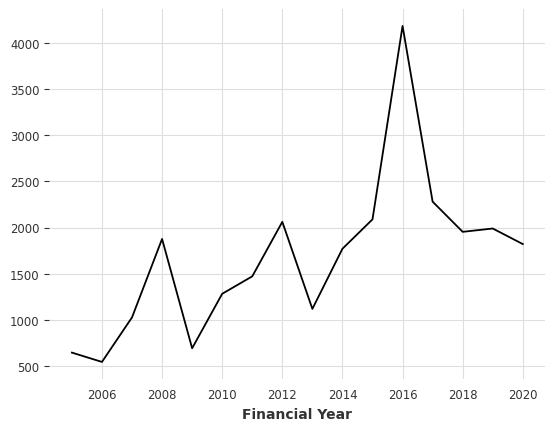

In [87]:
og_by_yr = df_oil_gas_2005_2020.groupby("Financial Year").mean()
og_by_yr["C-int-1+2"] = og_by_yr["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"] + og_by_yr["Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)"]
og_by_yr["C-int-1+2"].plot()

In [11]:
from darts import TimeSeries

In [89]:
tmp = og_by_yr["C-int-1+2"].reset_index()
tmp

Financial Year    C-int-1+2
0             2005   645.897991
1             2006   544.990326
2             2007  1027.194202
3             2008  1876.496410
4             2009   692.944722
5             2010  1282.806594
6             2011  1471.506168
7             2012  2061.695240
8             2013  1119.273443
9             2014  1770.336495
10            2015  2088.575378
11            2016  4183.118964
12            2017  2280.407614
13            2018  1953.536905
14            2019  1989.586448
15            2020  1821.045947

In [90]:
series = TimeSeries.from_dataframe(tmp, "Financial Year", "C-int-1+2")
train, val = series[:-3], series[-3:]
train

<TimeSeries (DataArray) (Financial Year: 13, component: 1, sample: 1)>
array([[[ 645.89799067]],

       [[ 544.99032597]],

       [[1027.19420202]],

       [[1876.49641035]],

       [[ 692.94472244]],

       [[1282.80659381]],

       [[1471.50616772]],

       [[2061.6952402 ]],

       [[1119.2734432 ]],

       [[1770.33649535]],

       [[2088.57537795]],

       [[4183.11896438]],

       [[2280.40761354]]])
Coordinates:
  * Financial Year  (Financial Year) int64 2005 2006 2007 ... 2015 2016 2017
  * component       (component) object 'C-int-1+2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [91]:
from darts.models.forecasting.baselines import NaiveDrift

In [109]:
from darts.models.forecasting.auto_arima import AutoARIMA

In [93]:
model = NaiveDrift()
model.fit(train)
pred = model.predict(len(val))
pred

<TimeSeries (DataArray) (Financial Year: 3, component: 1, sample: 1)>
array([[[2416.61674878]],

       [[2552.82588402]],

       [[2689.03501926]]])
Coordinates:
  * Financial Year  (Financial Year) int64 2018 2019 2020
  * component       (component) object 'C-int-1+2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [94]:
series

<TimeSeries (DataArray) (Financial Year: 16, component: 1, sample: 1)>
array([[[ 645.89799067]],

       [[ 544.99032597]],

       [[1027.19420202]],

       [[1876.49641035]],

       [[ 692.94472244]],

       [[1282.80659381]],

       [[1471.50616772]],

       [[2061.6952402 ]],

       [[1119.2734432 ]],

       [[1770.33649535]],

       [[2088.57537795]],

       [[4183.11896438]],

       [[2280.40761354]],

       [[1953.53690452]],

       [[1989.58644756]],

       [[1821.04594737]]])
Coordinates:
  * Financial Year  (Financial Year) int64 2005 2006 2007 ... 2018 2019 2020
  * component       (component) object 'C-int-1+2'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

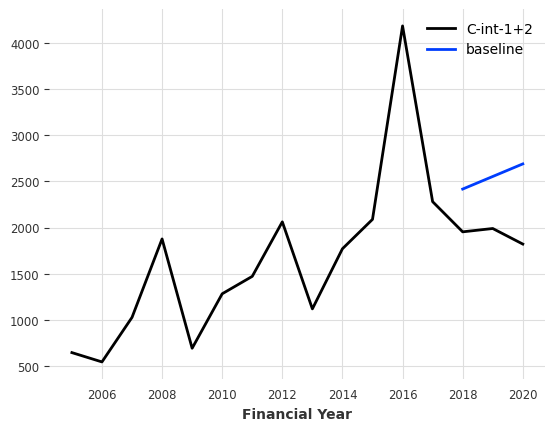

In [95]:
series.plot()
pred.plot(label="baseline", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [96]:
ind_names = ['Oil, Gas & Consumable Fuels',
    'Electric Utilities',
    'Automobiles',
    'Airlines',
    'Gas Utilities']

In [97]:
for industry in ind_names:
    df = data_2010_2020[data_2010_2020["GICS Industry Name"] == industry]
    df = df.groupby("Financial Year").mean()
    print(industry, df.shape)

Oil, Gas & Consumable Fuels (17, 21)
Electric Utilities (17, 21)
Automobiles (17, 21)
Airlines (17, 21)
Gas Utilities (16, 21)


In [98]:
# Naive Drift

<Figure size 2000x20000 with 0 Axes>

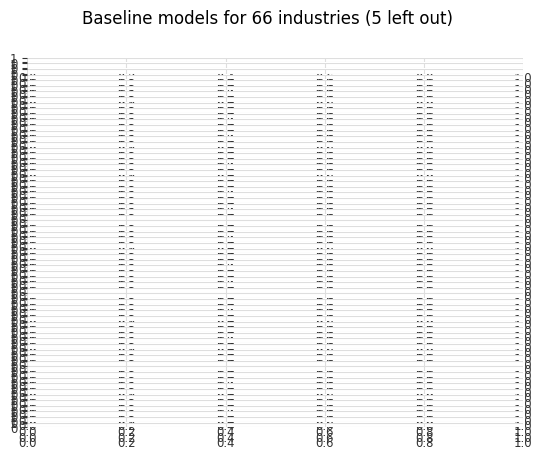

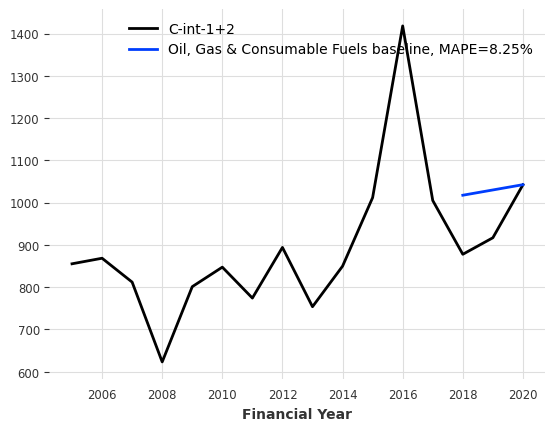

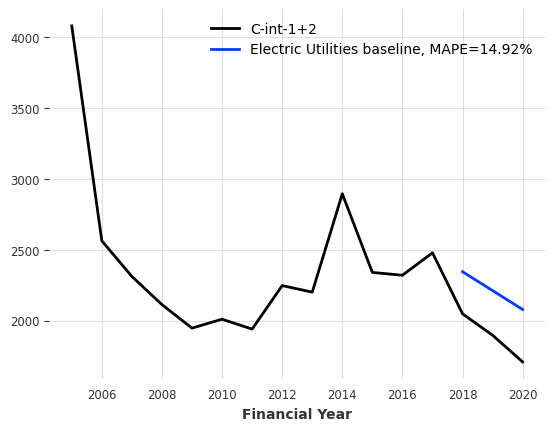

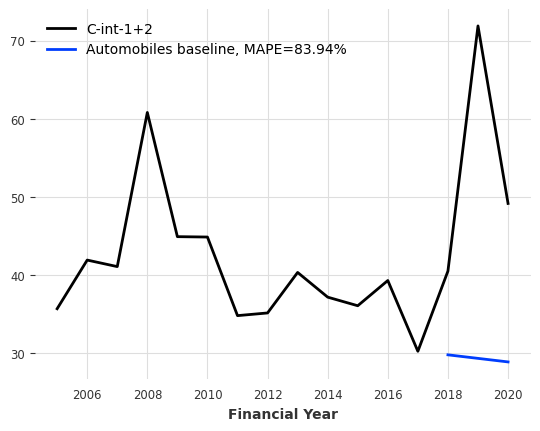

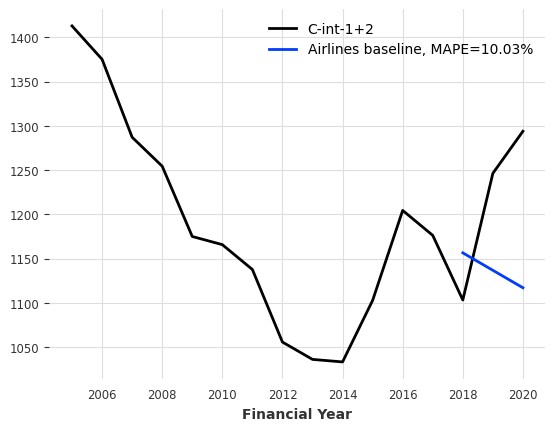

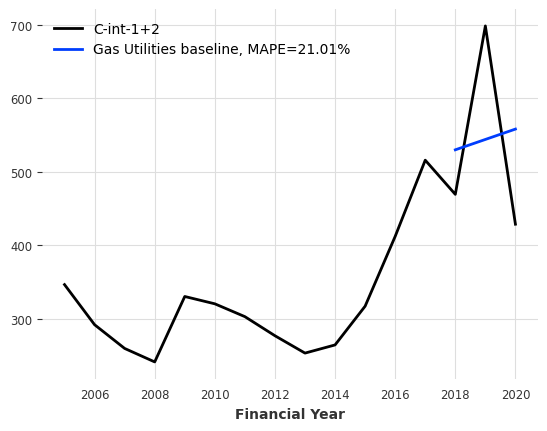

In [102]:
from darts.metrics import mape


output = {}
plt.figure(figsize=(20,200))
fig, ax = plt.subplots(66)
fig.suptitle('Baseline models for 66 industries (5 left out)')

for index, industry in enumerate(ind_names):
    df = data_2010_2020[data_2010_2020["GICS Industry Name"] == industry]
    df = df.groupby("Financial Year").mean()
    df["C-int-1+2"] = df["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"] + df["Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)"]
    tmp = df["C-int-1+2"].reset_index()
    if industry != 'Gas Utilities':
        tmp = tmp.drop([16], axis=0)
    series = TimeSeries.from_dataframe(tmp, "Financial Year", "C-int-1+2")
    train, val = series[:-3], series[-3:]
    model = NaiveDrift()
    model.fit(train)
    pred = model.predict(len(val))
    output[industry] = pred
    err = mape(pred, series)
    series.plot(new_plot=True)
    pred.plot(label=f"{industry} baseline, MAPE={round(err,2)}%") 

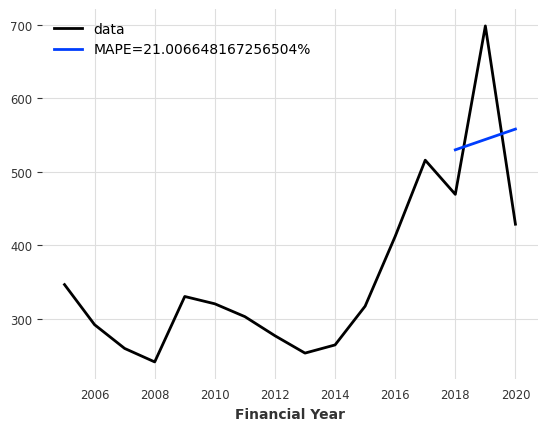

In [100]:
from darts.metrics import mape

series.plot(label='data')


pred.plot(lw=2, label=f'MAPE={err}%')

In [103]:
data_2005_2020.nunique()

TCUID                                                                387
Financial Year                                                        17
GICS Sector Name                                                      11
GICS Industry Group Name                                              25
GICS Industry Name                                                    66
GICS Sub Industry Name                                               125
Carbon-Scope 1 (tonnes CO2e)                                        4297
Carbon-Scope 2 (tonnes CO2e)                                        4298
Carbon-Scope 3 (tonnes CO2e)                                        4302
Carbon-Direct (tonnes CO2e)                                         4297
Carbon-First Tier Indirect (tonnes CO2e)                            4302
Carbon-Direct+First Tier Indirect (tonnes CO2e)                     4302
Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)                       4217
Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)      

In [115]:
ind_names

['Oil, Gas & Consumable Fuels',
 'Electric Utilities',
 'Automobiles',
 'Airlines',
 'Gas Utilities']

In [121]:
from darts.models.forecasting.sf_auto_arima import StatsForecastAutoARIMA


ARIMA(1,0,1) with non-zero mean:166.00121380252347

ARIMA(0,0,0) with non-zero mean:161.17512588325187

ARIMA(1,0,0) with non-zero mean:162.51544677679823

ARIMA(0,0,1) with non-zero mean:161.57290165815306

ARIMA(0,0,0) with zero mean    :212.71660719805575

ARIMA(0,0,0) with non-zero mean:161.17512588325187
Now re-fitting the best model(s) without approximations...


ARIMA(0,0,0) with non-zero mean:161.17512588325187


/Users/madeleinecussac/.pyenv/versions/3.8.12/envs/carbon-forecast/lib/python3.8/site-packages/statsforecast/arima.py:2426: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat([lo, mean, hi], 1)


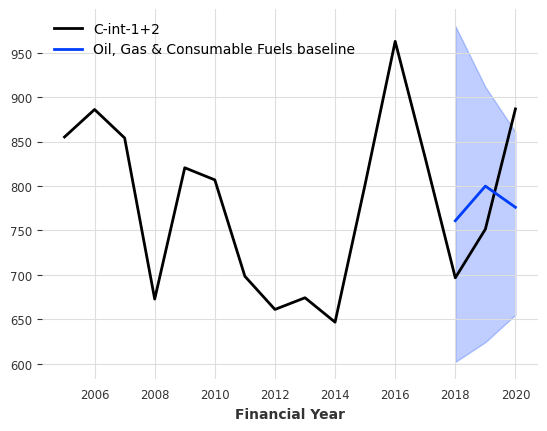

In [132]:
# ARIMA 

output = {}
# plt.figure(figsize=(20,200))
# fig, ax = plt.subplots(66)
# fig.suptitle('Baseline models for 66 industries (5 left out)')

for index, industry in enumerate(ind_names):
    df = data_2005_2020[data_2005_2020["GICS Industry Name"] == industry]
    df = df.groupby("Financial Year").mean()
    df["C-int-1+2"] = df["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"] + df["Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)"]
    tmp = df["C-int-1+2"].reset_index()
#     print(tmp)
    if industry == 'Oil, Gas & Consumable Fuels':
        tmp = tmp.drop([16], axis=0)
    if industry == 'Electric Utilities':
        tmp = tmp.drop([16], axis=0)
    series = TimeSeries.from_dataframe(tmp, "Financial Year", "C-int-1+2")
    train, val = series[:-3], series[-3:]
    model = StatsForecastAutoARIMA(start_p=1, max_p=5, start_q=1, max_q=5, trace=True)
    model.fit(train)
    pred = model.predict(len(val), num_samples=10)
    output[industry] = pred
    err = mape(pred, series)
    series.plot(new_plot=True)
#     pred.plot(label=f"{industry} baseline, MAPE={round(err,2)}%") 
    pred.plot(label=f"{industry} baseline", low_quantile=0.05, high_quantile=0.95)

    break
    
    

In [ ]:
    series = TimeSeries.from_dataframe(tmp, "Financial Year", "C-int-1+2")
    train, val = series[:-3], series[-3:]
    model = AutoARIMA(min_p=1, max_p=3)
    model.fit(train)
    pred = model.predict(len(val))
    output[industry] = pred
    err = mape(pred, series)
    series.plot(new_plot=True)
    pred.plot(label=f"{industry} baseline, MAPE={round(err,2)}%") 

## RNN Model

Run RNN with Energy sector

In [14]:
data = pd.read_csv("../../mcussac/data_forecast_carbon/for_RNN_energy.csv")
pd.set_option('display.max_columns', None)
data.head()

Unnamed: 0  Financial Year  3D Systems Corporation  \
0           0            2005                     NaN   
1           1            2006                     NaN   
2           2            2007                     NaN   
3           3            2008                     NaN   
4           4            2009                     NaN   

   AAG Energy Holdings Limited  AJ Networks Co.,Ltd.  APA Corporation  \
0                          NaN                   NaN     4.287862e+06   
1                          NaN                   NaN     3.431465e+06   
2                          NaN                   NaN     4.297651e+06   
3                          NaN                   NaN     3.361742e+06   
4                          NaN                   NaN     1.154348e+07   

   ARC Resources Ltd.  AVIC Joy Holdings (HK) Limited        AWE Ltd  \
0       443142.933546                             NaN    2241.821128   
1       788583.603644                             NaN    7595.277807   
2       800598.959521                             NaN   52216.027580   
3       750586.028300                             NaN  301711.022800   
4       805997.097600                             NaN  611453.966000   

   Abraxas Petroleum Corporation  Adani Enterprises Limited  Addax Petroleum  \
0                            NaN                        NaN              NaN   
1                            NaN                        NaN     6.733343e+05   
2                            NaN                        NaN     1.303010e+06   
3                            NaN                        NaN     1.025449e+06   
4                            NaN                        NaN              NaN   

   Advantage Energy Ltd.  Aegean Marine Petroleum  Aegis Logistics Limited  \
0                    NaN                      NaN                      NaN   
1                    NaN                      NaN                      NaN   
2                    NaN                      NaN                      NaN   
3                    NaN                      NaN                      NaN   
4                    NaN                      NaN                      NaN   

   Aemetis, Inc.      Afren Plc  Agritrade Resources Limited    Akastor ASA  \
0            NaN            NaN                          NaN  102002.599270   
1            NaN            NaN                          NaN  127128.688873   
2            NaN            NaN                          NaN  145453.180449   
3            NaN            NaN                          NaN  149531.892402   
4            NaN  139240.557632                          NaN  139532.332974   

        Aker ASA  Aker BP ASA  Aker Solutions ASA  \
0  492285.241665          NaN                 NaN   
1  620695.547168          NaN                 NaN   
2   86378.311761          NaN                 NaN   
3            NaN          NaN                 NaN   
4            NaN          NaN                 NaN   

   Aldrees Petroleum and Transport Services Company  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Alexandria Real Estate Equities, Inc.  Alpha Metallurgical Resources, Inc.  \
0                                    NaN                                  NaN   
1                             704.833449                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   

   Alpha Natural Resources, Inc.  Alpha PetroVision Holding AG  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                   5.127742

In [28]:
data.columns

Index(['Unnamed: 0', 'Financial Year', '3D Systems Corporation',
       'AAG Energy Holdings Limited', 'AJ Networks Co.,Ltd.',
       'APA Corporation', 'ARC Resources Ltd.',
       'AVIC Joy Holdings (HK) Limited', 'AWE Ltd',
       'Abraxas Petroleum Corporation',
       ...
       'Yankuang Energy Group Company Limited',
       'Yantai Jereh Oilfield Services Group Co., Ltd.', 'Yes Bank Limited',
       'Yinson Holdings Berhad', 'Yuan Heng Gas Holdings Limited',
       'Z Energy Limited',
       'Zhengzhou Coal Mining Machinery Group Company Limited',
       'Zhongman Petroleum and Natural Gas Group Corp., Ltd.',
       'Zhongxing Tianheng Energy Technology (Beijing) Co.,Ltd.',
       'sxr Uranium One Inc.'],
      dtype='object', length=928)

In [26]:
data.drop(columns=['Unnamed: 0', 'Financial Year']).columns.to_list()

['3D Systems Corporation',
 'AAG Energy Holdings Limited',
 'AJ Networks Co.,Ltd.',
 'APA Corporation',
 'ARC Resources Ltd.',
 'AVIC Joy Holdings (HK) Limited',
 'AWE Ltd',
 'Abraxas Petroleum Corporation',
 'Adani Enterprises Limited',
 'Addax Petroleum',
 'Advantage Energy Ltd.',
 'Aegean Marine Petroleum',
 'Aegis Logistics Limited',
 'Aemetis, Inc.',
 'Afren Plc',
 'Agritrade Resources Limited',
 'Akastor ASA',
 'Aker ASA',
 'Aker BP ASA',
 'Aker Solutions ASA',
 'Aldrees Petroleum and Transport Services Company',
 'Alexandria Real Estate Equities, Inc.',
 'Alpha Metallurgical Resources, Inc.',
 'Alpha Natural Resources, Inc.',
 'Alpha PetroVision Holding AG',
 'Alta Mesa Resources, Inc.',
 'AltaGas Ltd.',
 'Alto Ingredients, Inc.',
 'American Resources Corporation',
 'Amplify Energy Corp.',
 'Ampol Limited',
 'Amyris, Inc.',
 'Anadarko Petroleum Corp',
 'Anant Raj Limited',
 'Andeavor',
 'Anglo Pacific Group PLC',
 'Anhui Hengyuan Coal-Electricity Group Co., Ltd.',
 'Antero Resou

In [29]:
data

Unnamed: 0  Financial Year  3D Systems Corporation  \
0            0            2005                     NaN   
1            1            2006                     NaN   
2            2            2007                     NaN   
3            3            2008                     NaN   
4            4            2009                     NaN   
5            5            2010                     NaN   
6            6            2011                     NaN   
7            7            2012                     NaN   
8            8            2013            17501.617572   
9            9            2014            21546.988718   
10          10            2015                     NaN   
11          11            2016                     NaN   
12          12            2017                     NaN   
13          13            2018                     NaN   
14          14            2019                     NaN   
15          15            2020                     NaN   

    AAG Energy Holdings Limited  AJ Networks Co.,Ltd.  APA Corporation  \
0                           NaN                   NaN     4.287862e+06   
1                           NaN                   NaN     3.431465e+06   
2                           NaN                   NaN     4.297651e+06   
3                           NaN                   NaN     3.361742e+06   
4                           NaN                   NaN     1.154348e+07   
5                           NaN                   NaN     1.090192e+07   
6                           NaN                   NaN     1.310190e+07   
7                           NaN                   NaN     1.208252e+07   
8                           NaN                   NaN     9.902410e+06   
9                           NaN                   NaN     8.501883e+06   
10                          NaN                   NaN     7.730834e+06   
11                          NaN          28284.995778     7.861236e+06   
12                          NaN                   NaN     7.051488e+06   
13                          NaN                   NaN     4.211603e+06   
14                115547.414913                   NaN     7.241184e+06   
15                128071.130000                   NaN     6.770000e+06   

    ARC Resources Ltd.  AVIC Joy Holdings (HK) Limited        AWE Ltd  \
0         4.431429e+05                             NaN    2241.821128   
1         7.885836e+05                             NaN    7595.277807   
2         8.005990e+05                             NaN   52216.027580   
3         7.505860e+05                             NaN  301711.022800   
4         8.059971e+05                             NaN  611453.966000   
5         8.910479e+05                             NaN  414462.072100   
6         9.003396e+05                             NaN  321478.878700   
7         9.686485e+05                             NaN  241904.099700   
8         1.046126e+06                             NaN  200878.127400   
9         1.153942e+06                             NaN  197916.475122   
10        1.078864e+06                             NaN  151940.388880   
11        9.810939e+05                     2215.190099   87695.086600   
12        1.011575e+06                             NaN   49231.967400   
13        8.957133e+05                             NaN            NaN   
14        6.345293e+05                             NaN            NaN   
15        6.175590e+05                             NaN            NaN   

    Abraxas Petroleum Corporation  Adani Enterprises Limited  Addax Petroleum  \
0                             NaN                        NaN              NaN   
1                             NaN                        NaN     6.733343e+05   
2                             NaN                        NaN     1.303010e+06   
3                             NaN                        NaN     1.025449e+06   
4                             NaN                        NaN              NaN   
5                             

In [30]:
lst = []
for i in data.drop(columns=['Unnamed: 0', 'Financial Year']).columns.to_list():
    series = TimeSeries.from_dataframe(data, "Financial Year", i)
    lst.append(series)

In [31]:
lst

[<TimeSeries (DataArray) (Financial Year: 16, component: 1, sample: 1)>
 array([[[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[17501.61757226]],
 
        [[21546.98871793]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]]])
 Coordinates:
   * Financial Year  (Financial Year) int64 2005 2006 2007 ... 2018 2019 2020
   * component       (component) object '3D Systems Corporation'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (Financial Year: 16, component: 1, sample: 1)>
 array([[[            nan]],
 
        [[            nan]],
 
        [[            nan]],
 
        [[   

In [32]:
len(lst)

926

In [33]:
0.2*926

185.20000000000002

In [34]:
train, val = lst[:750], lst[750:]

In [39]:
train

[<TimeSeries (DataArray) (Financial Year: 16, component: 1, sample: 1)>
 array([[[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[17501.61757226]],
 
        [[21546.98871793]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]],
 
        [[           nan]]])
 Coordinates:
   * Financial Year  (Financial Year) int64 2005 2006 2007 ... 2018 2019 2020
   * component       (component) object '3D Systems Corporation'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (Financial Year: 16, component: 1, sample: 1)>
 array([[[            nan]],
 
        [[            nan]],
 
        [[            nan]],
 
        [[   

In [35]:
from darts.models.forecasting.rnn_model import RNNModel

In [36]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [37]:
my_stopper = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.05,
    mode='min',
)

pl_trainer_kwargs={"callbacks": [my_stopper]}

In [45]:
model = RNNModel(model="GRU", input_chunk_length=4)

In [46]:
model.fit(train)

2022-09-07 11:40:54 main_logger ERROR: ValueError: The train dataset does not contain even one training sample. This is likely due to the provided training series being too short. This model expect series of length at least 25.


ValueError: The train dataset does not contain even one training sample. This is likely due to the provided training series being too short. This model expect series of length at least 25.

In [47]:
from darts.models.forecasting.nhits import NHiTSModel

In [51]:
model = NHiTSModel(input_chunk_length=4, output_chunk_length=4)

In [52]:
model.fit(train)

2022-09-07 11:43:50 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-09-07 11:43:50 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-09-07 11:43:50 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-09-07 11:43:50 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-09-07 11:43:50 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 804 K 
---------------------------------------------------
802 K     Trainable params
2.1 K     Non-trainable params
804 K     Total params
6.439     Total estimated model params size (MB)


Epoch 47:  93%|██▊| 196/211 [00:08<00:00, 22.85it/s, loss=nan, train_loss=nan.0]

/Users/madeleinecussac/.pyenv/versions/3.8.12/envs/carbon-forecast/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:653: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
|